task 70

In [1]:
import numpy as np
import torch
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.preprocessing import LabelEncoder
import os

# Check if we need to convert GloVe to word2vec format
glove_file = 'glove.6B.300d.txt'
word2vec_file = 'glove.6B.300d.word2vec.txt'

if not os.path.exists(word2vec_file):
    if os.path.exists(glove_file):
        print("Converting GloVe format to word2vec format...")
        glove2word2vec(glove_file, word2vec_file)
    else:
        raise FileNotFoundError(
            f"GloVe vectors file not found at {glove_file}. "
            "Please download from https://nlp.stanford.edu/projects/glove/"
        )

# Now load the converted file
print("Loading word vectors...")
word_vectors = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)
print(f"Loaded {len(word_vectors)} word vectors")

def text_to_vector(text, word_vectors):
    words = text.lower().split()
    vectors = []
    for word in words:
        if word in word_vectors:
            vectors.append(word_vectors[word])
    if len(vectors) == 0:
        return np.zeros(300)
    return np.mean(vectors, axis=0)

def load_data(filename):
    texts, labels = [], []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            label, text = line.strip().split('\t', 1)
            texts.append(text)
            labels.append(label)
    return texts, labels

def process_and_save_data(input_file, output_feature_file, output_label_file):
    texts, labels = load_data(input_file)
    
    features = np.array([text_to_vector(text, word_vectors) for text in texts])
    
    le = LabelEncoder()
    label_nums = le.fit_transform

Loading word vectors...
Loaded 400000 word vectors


task 71

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder

# First, let's properly load and preprocess the data
def load_data(filename):
    texts, labels = [], []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            label, text = line.strip().split('\t', 1)
            texts.append(text)
            labels.append(label)
    return texts, labels

# Load the training data
texts, labels = load_data('train.txt')

# Convert labels to numerical values
le = LabelEncoder()
Y_train = torch.from_numpy(le.fit_transform(labels)).long()

# For demonstration, let's create dummy word vectors (replace with actual word vectors)
# In practice, you'd use pre-trained word vectors like GloVe or Word2Vec
vocab = set()
for text in texts:
    vocab.update(text.lower().split())
vocab_size = len(vocab)
embedding_dim = 300

# Create random embeddings (replace with real word vectors)
word_vectors = {word: torch.randn(embedding_dim) for word in vocab}

# Convert texts to average word vectors
def text_to_vector(text, word_vectors):
    words = text.lower().split()
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if len(vectors) == 0:
        return torch.zeros(embedding_dim)
    return torch.mean(torch.stack(vectors), dim=0)

X_train = torch.stack([text_to_vector(text, word_vectors) for text in texts])

# Define model
class SingleLayerNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SingleLayerNN, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return F.softmax(self.linear(x), dim=1)

# Initialize model
input_dim = embedding_dim
output_dim = len(le.classes_)  # Number of unique classes
model = SingleLayerNN(input_dim, output_dim)

# Compute predictions
x1 = X_train[0:1]  # first sample
y_hat1 = model(x1)

X_1to4 = X_train[0:4]  # first 4 samples
Y_hat = model(X_1to4)

print("Prediction for first sample:", y_hat1)
print("Predictions for first 4 samples:", Y_hat)

Prediction for first sample: tensor([[0.0862, 0.0567, 0.0652, 0.0792, 0.0663, 0.0548, 0.0716, 0.0955, 0.0574,
         0.0827, 0.0719, 0.0691, 0.0760, 0.0674]], grad_fn=<SoftmaxBackward0>)
Predictions for first 4 samples: tensor([[0.0862, 0.0567, 0.0652, 0.0792, 0.0663, 0.0548, 0.0716, 0.0955, 0.0574,
         0.0827, 0.0719, 0.0691, 0.0760, 0.0674],
        [0.0878, 0.0727, 0.0692, 0.0624, 0.0649, 0.0421, 0.0682, 0.0927, 0.0791,
         0.0780, 0.0827, 0.0641, 0.0692, 0.0669],
        [0.0964, 0.0671, 0.0594, 0.0771, 0.0835, 0.0518, 0.0602, 0.0631, 0.0797,
         0.0551, 0.0624, 0.0707, 0.0821, 0.0912],
        [0.0749, 0.0755, 0.0611, 0.0613, 0.0772, 0.0641, 0.0702, 0.0597, 0.0673,
         0.0729, 0.0727, 0.0806, 0.0777, 0.0848]], grad_fn=<SoftmaxBackward0>)


task 72

In [3]:
# For single sample
x1 = X_train[0:1]
y1 = Y_train[0:1]

# Forward pass
output = model(x1)
loss = F.cross_entropy(output, y1)  # cross_entropy includes softmax

# Backward pass
model.zero_grad()
loss.backward()

print("Loss for single sample:", loss.item())
print("Gradients for W:")
print(model.linear.weight.grad)

# For first 4 samples
X_1to4 = X_train[0:4]
Y_1to4 = Y_train[0:4]

output = model(X_1to4)
loss = F.cross_entropy(output, Y_1to4)

model.zero_grad()
loss.backward()

print("\nLoss for 4 samples:", loss.item())
print("Gradients for W:")
print(model.linear.weight.grad)

Loss for single sample: 2.638613224029541
Gradients for W:
tensor([[-0.0008, -0.0005, -0.0016,  ..., -0.0014, -0.0022,  0.0003],
        [-0.0005, -0.0003, -0.0010,  ..., -0.0009, -0.0014,  0.0002],
        [-0.0006, -0.0004, -0.0012,  ..., -0.0010, -0.0017,  0.0002],
        ...,
        [-0.0007, -0.0004, -0.0012,  ..., -0.0011, -0.0018,  0.0003],
        [-0.0007, -0.0005, -0.0014,  ..., -0.0012, -0.0020,  0.0003],
        [-0.0006, -0.0004, -0.0012,  ..., -0.0010, -0.0017,  0.0002]])

Loss for 4 samples: 2.6350934505462646
Gradients for W:
tensor([[ 1.0640e-03, -1.0305e-03, -2.5997e-04,  ...,  9.2544e-04,
         -1.3549e-04, -5.1982e-05],
        [ 8.4954e-04, -7.5787e-04, -1.3661e-04,  ...,  9.9435e-04,
         -2.6920e-05, -1.1183e-04],
        [ 6.9416e-04, -7.5224e-04, -2.3676e-04,  ...,  7.8024e-04,
         -1.5198e-04, -9.8414e-05],
        ...,
        [ 8.5466e-04, -6.8683e-04, -1.1921e-04,  ...,  9.3943e-04,
         -6.2164e-05, -5.8232e-05],
        [ 9.3443e-04, -7.

task 73

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os



# Define the neural network
class SingleLayerNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.fc(x)

# Load and process data
texts, labels = load_data('train.txt')  # Replace with your actual data file

# Convert texts to vectors
X = np.array([text_to_vector(text, word_vectors) for text in texts])

# Convert labels to numerical values
le = LabelEncoder()
Y = le.fit_transform(labels)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Hyperparameters
input_dim = 300  # GloVe vector dimension
output_dim = len(le.classes_)  # Number of unique classes
learning_rate = 0.01
epochs = 100

# Model, loss, optimizer
model = SingleLayerNN(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    
    # Backward pass and optimize
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Save trained weights
torch.save(model.state_dict(), 'single_layer_nn.pth')

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == Y_test).sum().item() / Y_test.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')

Epoch [10/100], Loss: 2.6513
Epoch [20/100], Loss: 2.5961
Epoch [30/100], Loss: 2.5423
Epoch [40/100], Loss: 2.4899
Epoch [50/100], Loss: 2.4389
Epoch [60/100], Loss: 2.3893
Epoch [70/100], Loss: 2.3412
Epoch [80/100], Loss: 2.2947
Epoch [90/100], Loss: 2.2496
Epoch [100/100], Loss: 2.2060
Test Accuracy: 0.4984


task 74

In [5]:
def calculate_accuracy(model, X, Y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == Y).sum().item()
        return correct / Y.size(0)

# Calculate training accuracy
train_acc = calculate_accuracy(model, X_train, Y_train)

# Load and process validation data
val_texts, val_labels = load_data('valid.txt')  # Make sure this file exists

# Convert validation texts to vectors - FIXED: process each text individually
val_X = np.array([text_to_vector(text, word_vectors) for text in val_texts])

# Convert validation labels to numerical values
# IMPORTANT: Use transform() not fit_transform() to use same encoding as training
val_Y = le.transform(val_labels)  # Changed from fit_transform to transform

# Convert to PyTorch tensors
X_valid = torch.tensor(val_X, dtype=torch.float32)
Y_valid = torch.tensor(val_Y, dtype=torch.long)

# Calculate validation accuracy
valid_acc = calculate_accuracy(model, X_valid, Y_valid)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {valid_acc:.4f}")

Training Accuracy: 0.5152
Validation Accuracy: 0.5090


task 75

Epoch [10/100], Train Loss: 2.6320, Val Loss: 2.6313
Epoch [20/100], Train Loss: 2.5772, Val Loss: 2.5743
Epoch [30/100], Train Loss: 2.5237, Val Loss: 2.5187
Epoch [40/100], Train Loss: 2.4716, Val Loss: 2.4646
Epoch [50/100], Train Loss: 2.4210, Val Loss: 2.4121
Epoch [60/100], Train Loss: 2.3719, Val Loss: 2.3611
Epoch [70/100], Train Loss: 2.3242, Val Loss: 2.3118
Epoch [80/100], Train Loss: 2.2780, Val Loss: 2.2641
Epoch [90/100], Train Loss: 2.2334, Val Loss: 2.2181
Epoch [100/100], Train Loss: 2.1902, Val Loss: 2.1737


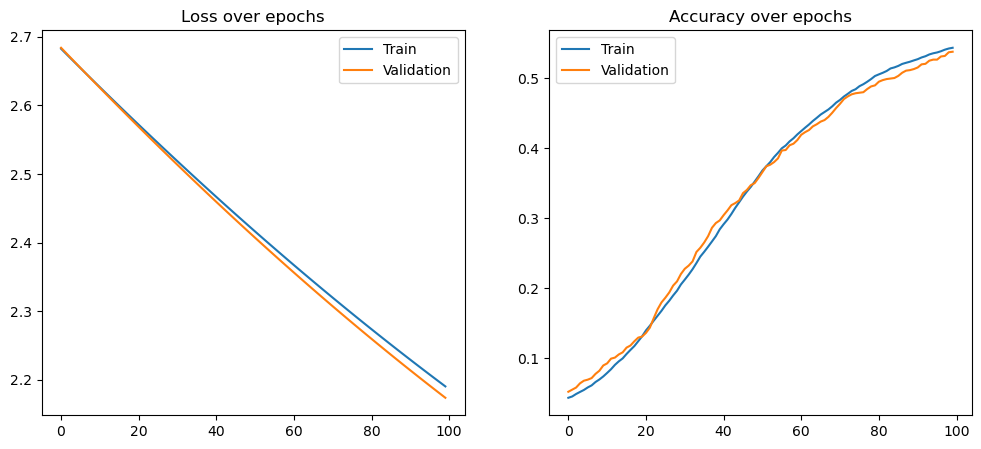

In [6]:
import matplotlib.pyplot as plt

# Initialize model
model = SingleLayerNN(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# For plotting
train_losses = []
valid_losses = []
train_accs = []
valid_accs = []

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    # Calculate accuracies
    model.eval()
    with torch.no_grad():
        # Training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_acc = (predicted == Y_train).sum().item() / Y_train.size(0)
        train_accs.append(train_acc)
        
        # Validation accuracy
        outputs_val = model(X_valid)
        loss_val = criterion(outputs_val, Y_valid)
        valid_losses.append(loss_val.item())
        _, predicted_val = torch.max(outputs_val.data, 1)
        valid_acc = (predicted_val == Y_valid).sum().item() / Y_valid.size(0)
        valid_accs.append(valid_acc)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {loss_val.item():.4f}')

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(valid_losses, label='Validation')
plt.title('Loss over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(valid_accs, label='Validation')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

task 76

In [7]:
import os

# Create checkpoint directory
os.makedirs('checkpoints', exist_ok=True)

for epoch in range(epochs):
    # Training code same as before...
    
    # Save checkpoint
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss': loss.item(),
        'valid_loss': loss_val.item(),
        'train_acc': train_acc,
        'valid_acc': valid_acc
    }
    torch.save(checkpoint, f'checkpoints/epoch_{epoch+1}.pth')

task 77

In [8]:
from torch.utils.data import DataLoader, TensorDataset

# Create datasets
train_dataset = TensorDataset(X_train, Y_train)
valid_dataset = TensorDataset(X_valid, Y_valid)

# Hyperparameters
batch_size = 8  # try 1, 2, 4, 8, etc.
epochs = 100

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

# Model, loss, optimizer
model = SingleLayerNN(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_Y in valid_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_Y.size(0)
            correct += (predicted == batch_Y).sum().item()
    
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss/len(train_loader):.4f}, Val Loss: {valid_loss/len(valid_loader):.4f}, Val Acc: {correct/total:.4f}')

Epoch [1/100], Train Loss: 1.5079, Val Loss: 1.1231, Val Acc: 0.6687
Epoch [2/100], Train Loss: 1.0432, Val Loss: 0.9825, Val Acc: 0.6784
Epoch [3/100], Train Loss: 0.9420, Val Loss: 0.9204, Val Acc: 0.6829
Epoch [4/100], Train Loss: 0.8909, Val Loss: 0.8870, Val Acc: 0.6762
Epoch [5/100], Train Loss: 0.8594, Val Loss: 0.8674, Val Acc: 0.6844
Epoch [6/100], Train Loss: 0.8383, Val Loss: 0.8537, Val Acc: 0.6882
Epoch [7/100], Train Loss: 0.8230, Val Loss: 0.8448, Val Acc: 0.6919
Epoch [8/100], Train Loss: 0.8112, Val Loss: 0.8380, Val Acc: 0.6934
Epoch [9/100], Train Loss: 0.8022, Val Loss: 0.8335, Val Acc: 0.6957
Epoch [10/100], Train Loss: 0.7970, Val Loss: 0.8308, Val Acc: 0.6994
Epoch [11/100], Train Loss: 0.7894, Val Loss: 0.8288, Val Acc: 0.7001
Epoch [12/100], Train Loss: 0.7847, Val Loss: 0.8270, Val Acc: 0.7024
Epoch [13/100], Train Loss: 0.7810, Val Loss: 0.8261, Val Acc: 0.7024
Epoch [14/100], Train Loss: 0.7772, Val Loss: 0.8249, Val Acc: 0.7039
Epoch [15/100], Train Loss: 0

task 78

In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Create datasets
train_dataset = TensorDataset(X_train, Y_train)
valid_dataset = TensorDataset(X_valid, Y_valid)

# Hyperparameters
batch_size = 8  # try 1, 2, 4, 8, etc.
epochs = 100

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

# Model, loss, optimizer
model = SingleLayerNN(input_dim, output_dim).to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_Y in train_loader:
        # Move batch data to GPU
        batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_Y in valid_loader:
            # Move batch data to GPU
            batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_Y.size(0)
            correct += (predicted == batch_Y).sum().item()
    
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss/len(train_loader):.4f}, Val Loss: {valid_loss/len(valid_loader):.4f}, Val Acc: {correct/total:.4f}')

Using device: cuda
Epoch [1/100], Train Loss: 1.5092, Val Loss: 1.1283, Val Acc: 0.6649
Epoch [2/100], Train Loss: 1.0423, Val Loss: 0.9861, Val Acc: 0.6709
Epoch [3/100], Train Loss: 0.9420, Val Loss: 0.9247, Val Acc: 0.6724
Epoch [4/100], Train Loss: 0.8914, Val Loss: 0.8910, Val Acc: 0.6762
Epoch [5/100], Train Loss: 0.8598, Val Loss: 0.8704, Val Acc: 0.6777
Epoch [6/100], Train Loss: 0.8401, Val Loss: 0.8564, Val Acc: 0.6897
Epoch [7/100], Train Loss: 0.8225, Val Loss: 0.8463, Val Acc: 0.6927
Epoch [8/100], Train Loss: 0.8122, Val Loss: 0.8399, Val Acc: 0.6949
Epoch [9/100], Train Loss: 0.8025, Val Loss: 0.8354, Val Acc: 0.6994
Epoch [10/100], Train Loss: 0.7952, Val Loss: 0.8326, Val Acc: 0.7001
Epoch [11/100], Train Loss: 0.7905, Val Loss: 0.8301, Val Acc: 0.6987
Epoch [12/100], Train Loss: 0.7849, Val Loss: 0.8278, Val Acc: 0.7001
Epoch [13/100], Train Loss: 0.7811, Val Loss: 0.8271, Val Acc: 0.7031
Epoch [14/100], Train Loss: 0.7786, Val Loss: 0.8255, Val Acc: 0.7069
Epoch [15/

task 79

Using device: cuda
Class distribution:
Class 10: 4511 samples
Class 13: 1204 samples
Class 11: 4225 samples
Class 12: 732 samples
Class 0: 1 samples
Class 1: 1 samples
Class 2: 1 samples
Class 3: 1 samples
Class 4: 1 samples
Class 5: 1 samples
Class 6: 1 samples
Class 7: 1 samples
Class 8: 1 samples
Class 9: 1 samples
Options:
1. Remove these classes
2. Use simple train/test split without stratification
3. Combine rare classes or oversample them
Using regular split without stratification due to rare classes
Number of classes detected: 14
Training class distribution: {4: 1, 8: 1, 9: 1, 10: 2734, 11: 2533, 12: 412, 13: 726}
Validation class distribution: {2: 1, 5: 1, 6: 1, 7: 1, 10: 903, 11: 849, 12: 152, 13: 229}
Test class distribution: {0: 1, 1: 1, 3: 1, 10: 874, 11: 843, 12: 168, 13: 249}
Training set size: 6408
Validation set size: 2137
Test set size: 2137
Class imbalance detected. Using weighted loss.
Starting training...
Epoch [1/100], Train Loss: 1.9157, Val Loss: 1.6213, Val Acc

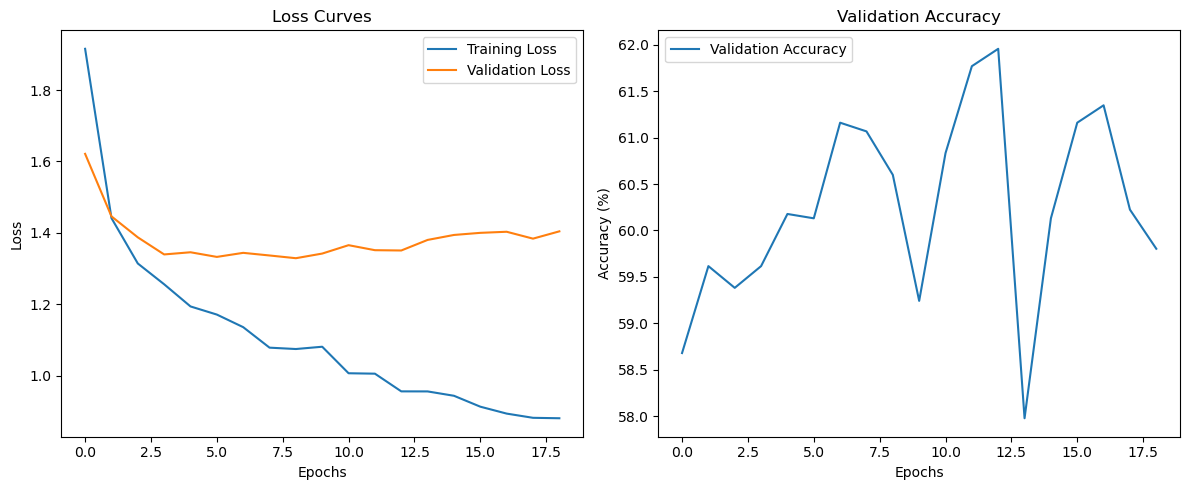

Test Accuracy: 60.79%
Training and evaluation complete!


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Assuming X and Y are your original data
# If you don't have these defined, replace with your actual data loading code
# X = ... # Your feature data
# Y = ... # Your target labels

# First, analyze class distribution
if isinstance(Y, torch.Tensor):
    Y_numpy = Y.numpy()
else:
    Y_numpy = Y

class_counts = Counter(Y_numpy)
print("Class distribution:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

# Identify classes with too few samples (less than 3)
rare_classes = [cls for cls, count in class_counts.items() if count < 3]
if rare_classes:
    print(f"Warning: Classes {rare_classes} have less than 3 samples each.")
    print("Options:")
    print("1. Remove these classes")
    print("2. Use simple train/test split without stratification")
    print("3. Combine rare classes or oversample them")
    
    # For now, we'll go with option 2: simple split without stratification
    use_stratify = False
else:
    use_stratify = True

# Data split
if use_stratify:
    # Standard approach with stratification
    X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y_numpy)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42, stratify=Y_temp)
else:
    # Alternative approach without stratification for rare classes
    print("Using regular split without stratification due to rare classes")
    X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42)
    
    # Check if any classes are completely missing from any split
    train_classes = set(Y_train.numpy() if isinstance(Y_train, torch.Tensor) else Y_train)
    valid_classes = set(Y_valid.numpy() if isinstance(Y_valid, torch.Tensor) else Y_valid)
    test_classes = set(Y_test.numpy() if isinstance(Y_test, torch.Tensor) else Y_test)
    all_classes = set(Y_numpy)
    
    missing_classes = {
        'train': all_classes - train_classes,
        'valid': all_classes - valid_classes,
        'test': all_classes - test_classes
    }
    
    for split_name, missing in missing_classes.items():
        if missing:
            print(f"Warning: Classes {missing} are missing from the {split_name} split!")

# Feature normalization/standardization
scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train.numpy() if isinstance(X_train, torch.Tensor) else X_train), dtype=torch.float32)
X_valid = torch.tensor(scaler.transform(X_valid.numpy() if isinstance(X_valid, torch.Tensor) else X_valid), dtype=torch.float32)
X_test = torch.tensor(scaler.transform(X_test.numpy() if isinstance(X_test, torch.Tensor) else X_test), dtype=torch.float32)

# Ensure labels are long tensors
Y_train = torch.tensor(Y_train.numpy() if isinstance(Y_train, torch.Tensor) else Y_train, dtype=torch.long)
Y_valid = torch.tensor(Y_valid.numpy() if isinstance(Y_valid, torch.Tensor) else Y_valid, dtype=torch.long)
Y_test = torch.tensor(Y_test.numpy() if isinstance(Y_test, torch.Tensor) else Y_test, dtype=torch.long)

# First determine number of classes from the data
num_classes = len(set(Y_numpy))  # Better to use the full dataset to determine class count
print(f"Number of classes detected: {num_classes}")

# Verify all labels are within valid range
assert torch.min(Y_train) >= 0, "Negative labels found in training data"
assert torch.max(Y_train) < num_classes, "Labels exceed number of classes in training data"
assert torch.min(Y_valid) >= 0, "Negative labels found in validation data"
assert torch.max(Y_valid) < num_classes, "Labels exceed number of classes in validation data"
assert torch.min(Y_test) >= 0, "Negative labels found in test data"
assert torch.max(Y_test) < num_classes, "Labels exceed number of classes in test data"

# Check class distribution in splits
def print_class_distribution(y, name):
    if isinstance(y, torch.Tensor):
        y_numpy = y.numpy()
    else:
        y_numpy = y
    unique, counts = np.unique(y_numpy, return_counts=True)
    dist = dict(zip(unique, counts))
    print(f"{name} class distribution: {dist}")
    return dist

train_dist = print_class_distribution(Y_train, "Training")
valid_dist = print_class_distribution(Y_valid, "Validation")
test_dist = print_class_distribution(Y_test, "Test")

# Create datasets
train_dataset = TensorDataset(X_train, Y_train)
valid_dataset = TensorDataset(X_valid, Y_valid)
test_dataset = TensorDataset(X_test, Y_test)

# Print dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(valid_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Hyperparameters
batch_size = 32
epochs = 100
learning_rate = 0.001 
hidden_dim1 = 64
hidden_dim2 = 32
dropout_prob = 0.5
input_dim = X_train.shape[1]

# Data loaders - use smaller batch size if dataset is small
min_batch = min(batch_size, len(train_dataset), len(valid_dataset), len(test_dataset))
train_loader = DataLoader(train_dataset, batch_size=min_batch, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=min_batch)
test_loader = DataLoader(test_dataset, batch_size=min_batch)

# Neural Network Architecture
class EnhancedNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout_prob=0.5):
        super(EnhancedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.layer3 = nn.Linear(hidden_dim2, output_dim)
        self.dropout = nn.Dropout(dropout_prob)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer3(x)
        return x

# Initialize model
model = EnhancedNN(
    input_dim=input_dim,
    hidden_dim1=hidden_dim1,
    hidden_dim2=hidden_dim2,
    output_dim=num_classes,
    dropout_prob=dropout_prob
).to(device)

# If we have class imbalance, use weighted loss
if max(class_counts.values()) / min(class_counts.values()) > 3:
    print("Class imbalance detected. Using weighted loss.")
    # Calculate class weights inversely proportional to frequency
    class_weights = torch.tensor(
        [1.0 / class_counts.get(i, 1) for i in range(num_classes)],
        dtype=torch.float32
    ).to(device)
    # Normalize weights
    class_weights = class_weights / class_weights.sum() * num_classes
    criterion = nn.CrossEntropyLoss(weight=class_weights)
else:
    criterion = nn.CrossEntropyLoss()

# Optimizer with weight decay
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training history for plotting
train_losses = []
val_losses = []
val_accs = []

# Training loop with early stopping
best_val_loss = float('inf')
patience = 10
patience_counter = 0

print("Starting training...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_Y in train_loader:
        batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_train_loss = running_loss/len(train_loader)
    train_losses.append(epoch_train_loss)
    
    # Validation
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_Y in valid_loader:
            batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_Y.size(0)
            correct += (predicted == batch_Y).sum().item()
    
    epoch_val_loss = valid_loss/len(valid_loader)
    epoch_val_acc = 100*correct/total
    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)
    
    # Update learning rate based on validation loss
    scheduler.step(epoch_val_loss)
    
    # Early stopping check
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    print(f'Epoch [{epoch+1}/{epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val Acc: {epoch_val_acc:.2f}%')

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))
print("Training complete. Best model loaded.")

# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')
plt.tight_layout()
plt.savefig('training_curves.png')
plt.show()

# Final evaluation on test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_targets = []

with torch.no_grad():
    for batch_X, batch_Y in test_loader:
        batch_X, batch_Y = batch_X.to(device), batch_Y.to(device)
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += batch_Y.size(0)
        correct += (predicted == batch_Y).sum().item()
        
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(batch_Y.cpu().numpy())

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

print("Training and evaluation complete!")